<a href="https://www.kaggle.com/code/lxlz1986/polynomial-regression-in-scikit-learn?scriptVersionId=142469530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Why we need Polynomial Regression?

[Linear Regresspion](https://www.kaggle.com/code/lxlz1986/linear-regression-model-in-scikit-learn) is a simple model to make predictions if the relationship between target and features in a dataset is linear or close to linear. 

However, most of the time, our data is much more complex that it is not sufficient to represent the relationship just using a straight line. In the cases with **non-linear** data, we can try to use polynomial to simulate the relationship between the output(prediction) and input(features), such as:

$$\hat{y} = \theta_0 + \theta_1x +\theta_2x^2$$

where $\hat{y}$ is the prediction, $x$ is the original feature and $x^2$ is the extended feature, which is the square of the original feature.

From the mathematical aspect, we can take this polynomial equation as a liner model in which $x$ and $x^2$ are two features of a data point. This makes it possible that we can train a linear model to fit the non-linear data. This method to make predictions is called **polynomial regression**.

## 2. How to train Polynomial Regression model using Linear Regression model?

As mentioned above, we can train a liner model to fit non-liner data by extend the single feature to multiple features. 
There are many ways to extend the feature, and one straight way is to add powers to the original feature. 

Now, we will look at how it works in Scikit-Learn.

### 2.1 Import necessary packages

In [1]:
import numpy as np # linear algebra

import matplotlib as mpl # ploting
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression  # liner regression model
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)

### 2.2 Generate non-linear dataset based on 2-degree polynomial 

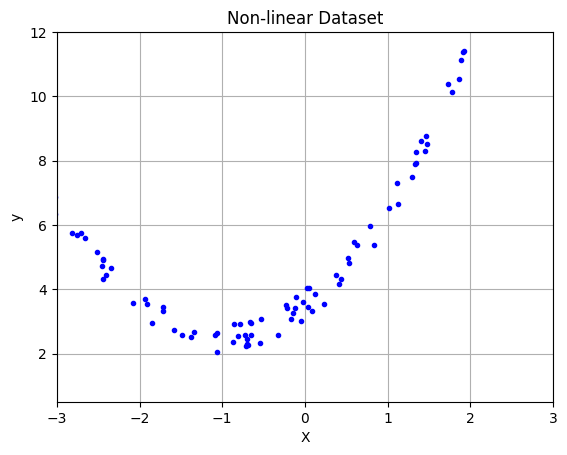

In [2]:
n = 100
X = 6 * np.random.rand(n,1)-4
y = X**2 + 2 * X + 3 + np.random.rand(n,1)

# plotting the dataset
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Non-linear Dataset')
plt.axis([-3,3,0.5,12])
plt.grid(True)

Here we see that the generated dataset is obviously non-linear. 

### 2.3 Transforme dataset to have polynomial features
In oder to have polynomial features, we add square of each feature as new features. This can be down with the help of `PolynomialFeature` and `fit_transform` in Scikit-Learn.

In [3]:
poly_features = PolynomialFeatures(degree=2) # decide the maximal degree of the polynomial feature
X_ploy = poly_features.fit_transform(X) # convert the original feature to polynomial feature


# check the extened polynomial features of the first data point
print('original feature:', X[0])
print('polynomial features',X_ploy[0])


original feature: [-1.93102199]
polynomial features [ 1.         -1.93102199  3.72884593]


### 2.4 Use new polynomial features to train the Linear Regression model

Now we can use the above obtained polynomial features to train the Linear Regression model.

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X_ploy,y)
lin_reg.intercept_, lin_reg.coef_ # check the bais term and feature weights of the trained model

(array([3.54130899]), array([[0.        , 2.00927061, 1.00282571]]))

### 2.5 Use the trained Linear Regression model to make predictions

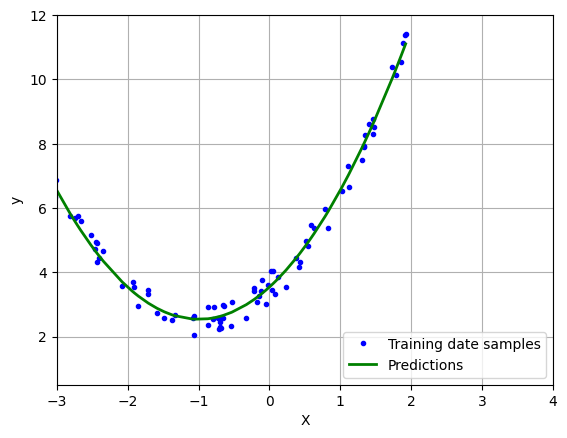

In [5]:
X_new = np.sort(X,axis = 0) # in order to plot the line of the model, we need to sort the the value of x-axis
X_new_ploy = poly_features.fit_transform(X_new) # compute the polynomial features 
y_predict = lin_reg.predict(X_new_ploy) # make predictions using trained Linear Regression model

# plot the original dataset and the prediction results
fig,ax = plt.subplots()
ax.plot(X,y,'b.', label = 'Training date samples')
ax.plot(X_new,y_predict,'g-',linewidth=2, label = 'Predictions')
ax.axis([-3,4,0.5,12])
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

From the comparasion we see that, the trained polynomial model fits the training dataset actually very well.